# Atividade - Semana 13 - Previsão (parte 1)

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

###Questão 1

> _A recente valorização do Bitcoin (BTC), que levou a criptomoeda ao seu melhor preço desde maio de 2022, é um sinal de que o próximo ciclo de alta, também chamado de **bull run**, pode estar chegando._
>
> * _https://portaldobitcoin.uol.com.br/alta-do-bitcoin-sinaliza-o-inicio-do-novo-bull-run-afirmam-especialistas/_

A partir dos dados `Adj Close` para a criptomoeda _bitcoin_ de **jan/2022** a **jun/2023**:

> a) Ajuste a base de dados para que seja compatível com o pacote `Prophet`.
>
> b) Defina o período de previsão como **15 dias úteis**. Assim, separe a base de dados e duas partes: `treino` e `teste`.
>
> c) Estime o modelo e realize previsões para os dados de `treino`e `teste` utilizando o pacote `Prophet`.
>
> d) Visualize o resultado da previsão utlizando um gráfico de série temporal.

In [53]:
# Questao 1

# Carregando pacotes
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Obtendo dados
df_bitcoin = yf.download("BTC-USD",
                         start="2022-01-01",     # Data inicial AAAA-MM-DD
                         end="2023-07-01",       # Data final AAAA-MM-DD
                         progress=False)

# Visualizando resultado
df_bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
...,...,...,...,...,...,...
2023-06-26,30480.523438,30636.029297,29955.744141,30271.130859,30271.130859,16493186997
2023-06-27,30274.320312,31006.787109,30236.650391,30688.164062,30688.164062,16428827944
2023-06-28,30696.560547,30703.279297,29921.822266,30086.246094,30086.246094,14571500779


In [56]:
# Questao 1
# Letra a)
df_bitcoin = df_bitcoin.reset_index()
df_bitcoin = df_bitcoin[['Date', 'Adj Close']]
df_bitcoin.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)
df_bitcoin

,ds,y
0,2022-01-01,47686.812500
1,2022-01-02,47345.218750
2,2022-01-03,46458.117188
3,2022-01-04,45897.574219
4,2022-01-05,43569.003906
...,...,...
541,2023-06-26,30271.130859
542,2023-06-27,30688.164062
543,2023-06-28,30086.246094
544,2023-06-29,30445.351562


In [57]:
# Questao 1
# Letra b)
# Numero de períodos que quero fazer previsão
periodo = 15

# DataFrame de treino
df_treino = df_bitcoin.iloc[:-periodo]

# DataFrame de teste
df_teste = df_bitcoin.iloc[-periodo:]

In [58]:
# Questao 1
# Letra c)
# Criando o modelo
modelo = Prophet()

# Estimando o modelo
modelo.fit(df_treino)

'''👉 Agora, vamos fazer previsões!
Previsões para dados de treino (passado)'''
previsoes_treino = modelo.predict(df_treino)

# Previsões para dados de teste (futuro)
previsoes_teste = modelo.predict(df_teste)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkovj0fy5/zse1n6ze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkovj0fy5/_zec_vnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94288', 'data', 'file=/tmp/tmpkovj0fy5/zse1n6ze.json', 'init=/tmp/tmpkovj0fy5/_zec_vnh.json', 'output', 'file=/tmp/tmpkovj0fy5/prophet_modelmem75cs2/prophet_model-20231031004339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:43:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:43:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


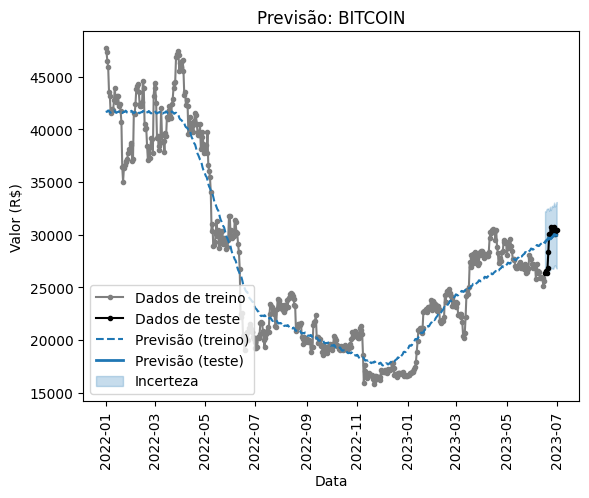

In [60]:
# Questao 1
# Letra d)
'''Visualizando o resultado:'''
# Dados de treino
plt.plot(df_treino['ds'], df_treino['y'], '.-',
         color='tab:grey', label='Dados de treino')

# Dados de teste
plt.plot(df_teste['ds'], df_teste['y'], '.-',
         color='black', label='Dados de teste')

# Previsão (treino)
plt.plot(df_treino['ds'], previsoes_treino['yhat'], '--',
         color='tab:blue', label='Previsão (treino)')

# Previsão (teste)
plt.plot(df_teste['ds'], previsoes_teste['yhat'],
         color='tab:blue', label='Previsão (teste)', linewidth=2.0)

# Incerteza (teste)
plt.fill_between(df_teste['ds'], previsoes_teste['yhat_lower'],
                 previsoes_teste['yhat_upper'],
                 color='tab:blue', alpha=0.25, label='Incerteza')

# Rótulos
plt.title('Previsão: BITCOIN')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')

# Legenda
plt.legend(loc='lower left') # local: esquerda inferior

# Rotacionando a data no eixo horizontal 90 graus
plt.xticks(rotation=90)

plt.show()

###Questão 2

> Prever as **flutuações** em séries de cotações de ações ou moedas é uma tarefa **complexa** devido à sua natureza **volátil**. Um recurso crucial explorado por especialistas nesse contexto é a **análise e previsão do retorno** da série. Essa abordagem se mostra altamente valiosa, uma vez que a série em questão tende a apresentar uma **evolução em torno de zero**, embora seja sujeita a oscilações imprevisíveis.
>
> **A análise de retorno é uma estratégia fundamental na previsão de séries financeiras**. Isso se deve ao fato de que, mesmo em meio a variações aparentemente aleatórias, o retorno médio tende a se estabilizar em torno de um ponto central.

A partir dos dados utilizados na questão anterior, refaça a análise utilizando a série de retornos da criptomoeda _bitcoin_ de **jan/2022** a **jun/2023**:


> a) Calcule os retornos da série (não se esqueça de remover os valores faltantes `NaN`).
>
> b) Refaça a mesma previsão da questão anterior.
>
> c) O que a previsão de tendência do retorno demonstra? É esperado que o retorno do _bitcoin_ cresça no futuro?

In [72]:
# Questao 2

# Carregando pacotes
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Obtendo dados
df_bitcoin = yf.download("BTC-USD",
                         start="2023-01-01",     # Data inicial AAAA-MM-DD
                         end="2023-07-01",       # Data final AAAA-MM-DD
                         progress=False)

# Visualizando resultado
df_bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566
...,...,...,...,...,...,...
2023-06-26,30480.523438,30636.029297,29955.744141,30271.130859,30271.130859,16493186997
2023-06-27,30274.320312,31006.787109,30236.650391,30688.164062,30688.164062,16428827944
2023-06-28,30696.560547,30703.279297,29921.822266,30086.246094,30086.246094,14571500779


In [73]:
# Questao 2
# Letra a)
df_bitcoin['Retorno'] = df_bitcoin['Adj Close'].pct_change()*100
df_bitcoin = df_bitcoin.reset_index()
df_bitcoin = df_bitcoin.dropna()
df_bitcoin = df_bitcoin.loc[:,['Date','Retorno']]
df_bitcoin.columns = ['ds','y']
df_bitcoin

,ds,y
1,2023-01-02,0.381295
2,2023-01-03,-0.051612
3,2023-01-04,1.099415
4,2023-01-05,-0.157158
5,2023-01-06,0.684411
...,...,...
176,2023-06-26,-0.686119
177,2023-06-27,1.377660
178,2023-06-28,-1.961401
179,2023-06-29,1.193587


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkovj0fy5/k7h5ky8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkovj0fy5/3cenkgml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52818', 'data', 'file=/tmp/tmpkovj0fy5/k7h5ky8a.json', 'init=/tmp/tmpkovj0fy5/3cenkgml.json', 'output', 'file=/tmp/tmpkovj0fy5/prophet_modelcwsusrql/prophet_model-20231031005714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


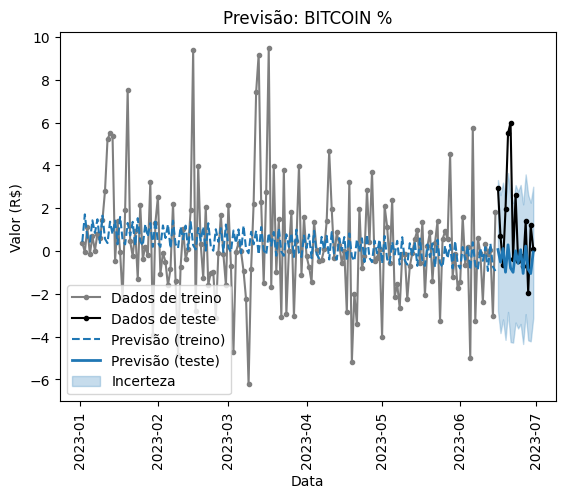

In [74]:
# Questao 2
# Letra b)
# Numero de períodos que quero fazer previsão
periodo = 15

# DataFrame de treino
df_treino = df_bitcoin.iloc[:-periodo]

# DataFrame de teste
df_teste = df_bitcoin.iloc[-periodo:]

# Criando o modelo
modelo = Prophet()

# Estimando o modelo
modelo.fit(df_treino)

'''👉 Agora, vamos fazer previsões!
Previsões para dados de treino (passado)'''
previsoes_treino = modelo.predict(df_treino)

# Previsões para dados de teste (futuro)
previsoes_teste = modelo.predict(df_teste)

# Dados de treino
plt.plot(df_treino['ds'], df_treino['y'], '.-',
         color='tab:grey', label='Dados de treino')

# Dados de teste
plt.plot(df_teste['ds'], df_teste['y'], '.-',
         color='black', label='Dados de teste')

# Previsão (treino)
plt.plot(df_treino['ds'], previsoes_treino['yhat'], '--',
         color='tab:blue', label='Previsão (treino)')

# Previsão (teste)
plt.plot(df_teste['ds'], previsoes_teste['yhat'],
         color='tab:blue', label='Previsão (teste)', linewidth=2.0)

# Incerteza (teste)
plt.fill_between(df_teste['ds'], previsoes_teste['yhat_lower'],
                 previsoes_teste['yhat_upper'],
                 color='tab:blue', alpha=0.25, label='Incerteza')

# Rótulos
plt.title('Previsão: BITCOIN %')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')

# Legenda
plt.legend(loc='lower left') # local: esquerda inferior

# Rotacionando a data no eixo horizontal 90 graus
plt.xticks(rotation=90)

plt.show()


In [ ]:
# Questao 2
# Letra c)
'''Muita volatilidade e previsão próxima a zero ou negativa em dimunição. Não é esperado um retorno bom no futuro'''

